# Handling neutral classification data from Indeed

### Context

*Indeed* reviews contain a "content" section with sentences that have not been explicitly labeled by their author as pros or cons.

We refer to these unlabeled reviews as "neutral." They make up our neutral classification data — the portion of our datasets that *lacks* gold labels.

### What this program does

For each company, we segment these unlabeled/neutral reviews into Pandas dataframes by their authorship dates — that is, whether the review was posted *before* a date that has been identified in our timeline, or after.

In [22]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [298]:
import pandas as pd

In [24]:
# Removing trailing whitespace from sentences (unneeded newlines, single-spaces, etc.)
def remove_whitespace_from(review_sentences):
  stripped_sentences = []
  for sentence in review_sentences:
    stripped_sentence = sentence.rstrip()
    stripped_sentences.append(stripped_sentence)
  return stripped_sentences

In [4]:
# Opening the neutral Indeed files

# Riot
riot_neutral_f = open("/content/drive/MyDrive/compling_final/Indeed/riotNeutralsIndeedClassified.txt", "r")
riot_neutral = remove_whitespace_from(riot_neutral_f.readlines())

# Sony
sony_neutral_f = open("/content/drive/MyDrive/compling_final/Indeed/sonyNeutralsIndeedClassified.txt", "r")
sony_neutral = remove_whitespace_from(sony_neutral_f.readlines())

# Ubisoft
ubisoft_neutral_f = open("/content/drive/MyDrive/compling_final/Indeed/ubisoftNeutralsIndeedClassified.txt", "r")
ubisoft_neutral = remove_whitespace_from(ubisoft_neutral_f.readlines())

# Activision
activision_neutral_f = open("/content/drive/MyDrive/compling_final/Indeed/activisionNeutralsIndeedClassified.txt", "r")
activision_neutral = remove_whitespace_from(activision_neutral_f.readlines())

In [5]:
# Corresponding authorship dates for these reviews

# Riot
riot_neutral_dates_f = open("/content/drive/MyDrive/compling_final/Indeed/dates/riotNeutralsIndeedDates.txt", "r")
riot_neutral_dates = remove_whitespace_from(riot_neutral_dates_f.readlines())

# Sony
sony_neutral_dates_f = open("/content/drive/MyDrive/compling_final/Indeed/dates/sonyNeutralsIndeedDates.txt", "r")
sony_neutral_dates = remove_whitespace_from(sony_neutral_dates_f.readlines())

# Ubisoft
ubisoft_neutral_dates_f = open("/content/drive/MyDrive/compling_final/Indeed/dates/ubisoftNeutralsIndeedDates.txt", "r")
ubisoft_neutral_dates = remove_whitespace_from(ubisoft_neutral_dates_f.readlines())

# Activision
activision_neutral_dates_f = open("/content/drive/MyDrive/compling_final/Indeed/dates/activisionNeutralsIndeedDates.txt", "r")
activision_neutral_dates = remove_whitespace_from(activision_neutral_dates_f.readlines())

In [6]:
print(riot_neutral)

['The company is trying to include more minority and more woman but it skews heavily male', 'They allow employee to be themselves', '[LISTSEP]', 'Company is passionate about making a difference in the industry and for player', 'I learned a lot about the pro and con of a solid company culture', 'Org experienced some growing pain at the time a it matured further and sought to develop it identity and structure a an organization', 'Riot really care about their employee , fantastic and creative coworkers who inspire you', 'They care about their employee and handled covid well by quickly sending folk home', "The long standing culture at Riot Games is one of misogyny , false wokeness , and `` locker room talk ''", 'Lots of talented colleague and great company culture', 'It doesn ’ t matter how exceptional you are at your craft : if gaming isn ’ t your heart and soul you will be shunned', 'It ’ s worse if you ’ re a girl there is a very specific mold they expect there', 'The culture is second 

In [7]:
print(riot_neutral_dates)

['08/10/2018', '01/29/2019', '[LISTSEP]', '03/17/2022', '03/17/2022', '03/17/2022', '12/03/2021', '01/16/2021', '08/07/2020', '02/25/2020', '11/26/2019', '11/26/2019', '11/04/2019', '07/31/2019', '07/30/2019', '01/14/2019', '07/19/2018', '04/24/2018', '04/17/2018', '02/05/2018', '02/05/2018', '11/15/2017', '05/14/2017', '07/01/2016', '11/22/2015', '08/29/2014', '08/29/2014', '07/26/2013', '06/29/2013', '[LISTSEP]', '08/10/2018', '01/16/2021', '03/18/2020', '11/26/2019', '11/04/2019', '07/31/2019', '07/30/2019', '01/22/2019', '07/19/2018', '07/19/2018', '10/30/2017', '09/15/2017', '09/15/2017', '03/15/2017', '01/18/2017', '01/18/2017', '10/27/2014', '07/26/2013', '[LISTSEP]', '10/08/2019', '[LISTSEP]', '08/10/2018', '03/17/2022', '12/03/2021', '06/22/2021', '06/22/2021', '06/22/2021', '08/07/2020', '06/19/2019', '04/30/2018', '04/24/2018', '04/24/2018', '04/24/2018', '04/17/2018', '04/17/2018', '11/15/2017', '10/30/2017', '10/30/2017', '10/30/2017', '10/30/2017', '09/15/2017', '06/26/20

In [8]:
category_delimiter = "[LISTSEP]"

# Begin by finding, and keeping track of, the category separation indices;
# AKA, the indices in each file (of reviews/dates) at which
# the previous category ends and the next category begins.

# Input:
#   (1) list of review sentences
#   (2) list of corresponding dates
def get_sep_indices(list1, list2):
  
  end_indices = []
  for i in range(len(list1)):
    if list1[i] == category_delimiter and list2[i] == category_delimiter:
      end_indices.append(i)
  
  start_indices = [0]
  for j in range(len(end_indices)-1):
    start_indices.append(end_indices[j]+1)
  
  final_indices = []
  for k in range(len(start_indices)):
    final_indices.append((start_indices[k], end_indices[k]))
  
  return final_indices

In [9]:
riot_idx = get_sep_indices(riot_neutral, riot_neutral_dates)
print("RIOT GAMES: Category indices")
print(riot_idx)

sony_idx = get_sep_indices(sony_neutral, sony_neutral_dates)
print("SONY: Category indices")
print(sony_idx)

ubisoft_idx = get_sep_indices(ubisoft_neutral, ubisoft_neutral_dates)
print("UBISOFT: Category indices")
print(ubisoft_idx)

activision_idx = get_sep_indices(activision_neutral, activision_neutral_dates)
print("ACTIVISION: Category indices")
print(activision_idx)

RIOT GAMES: Category indices
[(0, 2), (3, 29), (30, 48), (49, 50), (51, 82), (83, 95)]
SONY: Category indices
[(0, 9), (10, 46), (47, 90), (91, 97), (98, 184), (185, 214)]
UBISOFT: Category indices
[(0, 10), (11, 82), (83, 201), (202, 210), (211, 375), (376, 441)]
ACTIVISION: Category indices
[(0, 14), (15, 105), (106, 296), (297, 309), (310, 519), (520, 616)]


In [10]:
# Input: 
#     (1) List of review sentences (AKA features)
#     (2) List of corresponding authorship dates
#     (3) Number of the category that we want to create a DF from (1-6)
#     (4) List of index tuples, indicating when categories begin and end
# Output: Pandas DF
def create_category_df(features, dates, category_num, category_indices):

  # USER INPUT VALIDATION
  # First, verify if there are as many review sentences as there are
  # corresponding dates.
  # If this is the case, then we should be ready to proceed.

  if len(features) != len(dates):
    print("ERROR: Mismatch detected in review sentences and authorship dates.\nPlease check your input and try again.")
    return

  else:

    features_column = []
    dates_column = []
    start_idx = category_indices[category_num-1][0]
    end_idx = category_indices[category_num-1][1]

    for i in range(start_idx, end_idx):
      features_column.append(features[i])
      dates_column.append(dates[i])
    
    dictionary = {'features': features_column, 'dates': dates_column}
    return pd.DataFrame(dictionary)

In [11]:
# RIOT

riot_df_1 = create_category_df(riot_neutral, riot_neutral_dates, 1, riot_idx)   # Category 1: Diversity & inclusion
riot_df_2 = create_category_df(riot_neutral, riot_neutral_dates, 2, riot_idx)   # Category 2: Culture & values
riot_df_3 = create_category_df(riot_neutral, riot_neutral_dates, 3, riot_idx)   # Category 3: Work-life balance
riot_df_4 = create_category_df(riot_neutral, riot_neutral_dates, 4, riot_idx)   # Category 4: Senior management
riot_df_5 = create_category_df(riot_neutral, riot_neutral_dates, 5, riot_idx)   # Category 5: Career opportunities
riot_df_6 = create_category_df(riot_neutral, riot_neutral_dates, 6, riot_idx)   # Category 6: Compensation & benefits

In [12]:
# SONY

sony_df_1 = create_category_df(sony_neutral, sony_neutral_dates, 1, sony_idx)   # Category 1: Diversity & inclusion
sony_df_2 = create_category_df(sony_neutral, sony_neutral_dates, 2, sony_idx)   # Category 2: Culture & values
sony_df_3 = create_category_df(sony_neutral, sony_neutral_dates, 3, sony_idx)   # Category 3: Work-life balance
sony_df_4 = create_category_df(sony_neutral, sony_neutral_dates, 4, sony_idx)   # Category 4: Senior management
sony_df_5 = create_category_df(sony_neutral, sony_neutral_dates, 5, sony_idx)   # Category 5: Career opportunities
sony_df_6 = create_category_df(sony_neutral, sony_neutral_dates, 6, sony_idx)   # Category 6: Compensation & benefits

In [13]:
# UBISOFT

ubisoft_df_1 = create_category_df(ubisoft_neutral, ubisoft_neutral_dates, 1, ubisoft_idx)   # Category 1: Diversity & inclusion
ubisoft_df_2 = create_category_df(ubisoft_neutral, ubisoft_neutral_dates, 2, ubisoft_idx)   # Category 2: Culture & values
ubisoft_df_3 = create_category_df(ubisoft_neutral, ubisoft_neutral_dates, 3, ubisoft_idx)   # Category 3: Work-life balance
ubisoft_df_4 = create_category_df(ubisoft_neutral, ubisoft_neutral_dates, 4, ubisoft_idx)   # Category 4: Senior management
ubisoft_df_5 = create_category_df(ubisoft_neutral, ubisoft_neutral_dates, 5, ubisoft_idx)   # Category 5: Career opportunities
ubisoft_df_6 = create_category_df(ubisoft_neutral, ubisoft_neutral_dates, 6, ubisoft_idx)   # Category 6: Compensation & benefits

In [14]:
# ACTIVISION

activision_df_1 = create_category_df(activision_neutral, activision_neutral_dates, 1, activision_idx)   # Category 1: Diversity & inclusion
activision_df_2 = create_category_df(activision_neutral, activision_neutral_dates, 2, activision_idx)   # Category 2: Culture & values
activision_df_3 = create_category_df(activision_neutral, activision_neutral_dates, 3, activision_idx)   # Category 3: Work-life balance
activision_df_4 = create_category_df(activision_neutral, activision_neutral_dates, 4, activision_idx)   # Category 4: Senior management
activision_df_5 = create_category_df(activision_neutral, activision_neutral_dates, 5, activision_idx)   # Category 5: Career opportunities
activision_df_6 = create_category_df(activision_neutral, activision_neutral_dates, 6, activision_idx)   # Category 6: Compensation & benefits

# Using matplotlib to plot sentiment scores per company & per category across timeline

In [372]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from dateutil.relativedelta import relativedelta
import math

Using pros & cons for now

In [16]:
# Riot reviews

riot_pros_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/riotProsClassified.txt", 'r')
riot_pos_1 = remove_whitespace_from(riot_pros_f1.readlines())

riot_cons_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/riotConsClassified.txt", 'r')
riot_neg_1 = remove_whitespace_from(riot_cons_f1.readlines())

riot_pros_f2 = open("/content/drive/MyDrive/compling_final/Indeed/riotProsIndeedClassified.txt", 'r')
riot_pos_2 = remove_whitespace_from(riot_pros_f2.readlines())

riot_cons_f2 = open("/content/drive/MyDrive/compling_final/Indeed/riotConsIndeedClassified.txt", 'r')
riot_neg_2 = remove_whitespace_from(riot_cons_f2.readlines())

In [17]:
# Riot dates

riot_pros_dates_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/dates/riotPosDates.txt", "r")
riot_pos_dates_1 = remove_whitespace_from(riot_pros_dates_f1.readlines())

riot_cons_dates_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/dates/riotNegDates.txt", "r")
riot_neg_dates_1 = remove_whitespace_from(riot_cons_dates_f1.readlines())

riot_pros_dates_f2 = open("/content/drive/MyDrive/compling_final/Indeed/dates/riotProsIndeedDates.txt", "r")
riot_pos_dates_2 = remove_whitespace_from(riot_pros_dates_f2.readlines())

riot_cons_dates_f2 = open("/content/drive/MyDrive/compling_final/Indeed/dates/riotConsIndeedDates.txt", "r")
riot_neg_dates_2 = remove_whitespace_from(riot_cons_dates_f2.readlines())

In [311]:
# Sony reviews

sony_pros_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/sonyProsClassified.txt", 'r')
sony_pos_1 = remove_whitespace_from(sony_pros_f1.readlines())

sony_cons_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/sonyConsClassified.txt", 'r')
sony_neg_1 = remove_whitespace_from(sony_cons_f1.readlines())

sony_pros_f2 = open("/content/drive/MyDrive/compling_final/Indeed/sonyProsIndeedClassified.txt", 'r')
sony_pos_2 = remove_whitespace_from(sony_pros_f2.readlines())

sony_cons_f2 = open("/content/drive/MyDrive/compling_final/Indeed/sonyConsIndeedClassified.txt", 'r')
sony_neg_2 = remove_whitespace_from(sony_cons_f2.readlines())

In [312]:
# Sony dates

sony_pros_dates_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/dates/sonyPosDates.txt", "r")
sony_pos_dates_1 = remove_whitespace_from(sony_pros_dates_f1.readlines())

sony_cons_dates_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/dates/sonyNegDates.txt", "r")
sony_neg_dates_1 = remove_whitespace_from(sony_cons_dates_f1.readlines())

sony_pros_dates_f2 = open("/content/drive/MyDrive/compling_final/Indeed/dates/sonyProsIndeedDates.txt", "r")
sony_pos_dates_2 = remove_whitespace_from(sony_pros_dates_f2.readlines())

sony_cons_dates_f2 = open("/content/drive/MyDrive/compling_final/Indeed/dates/sonyConsIndeedDates.txt", "r")
sony_neg_dates_2 = remove_whitespace_from(sony_cons_dates_f2.readlines())

In [ ]:
# Ubisoft reviews

ubisoft_pros_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/ubisoftProsClassified.txt", 'r')
ubisoft_pos_1 = remove_whitespace_from(ubisoft_pros_f1.readlines())

ubisoft_cons_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/ubisoftConsClassified.txt", 'r')
ubisoft_neg_1 = remove_whitespace_from(ubisoft_cons_f1.readlines())

ubisoft_pros_f2 = open("/content/drive/MyDrive/compling_final/Indeed/ubisoftProsIndeedClassified.txt", 'r')
ubisoft_pos_2 = remove_whitespace_from(ubisoft_pros_f2.readlines())

ubisoft_cons_f2 = open("/content/drive/MyDrive/compling_final/Indeed/ubisoftConsIndeedClassified.txt", 'r')
ubisoft_neg_2 = remove_whitespace_from(ubisoft_cons_f2.readlines())

In [ ]:
# Ubisoft dates

ubisoft_pros_dates_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/dates/ubisoftPosDates.txt", "r")
ubisoft_pos_dates_1 = remove_whitespace_from(ubisoft_pros_dates_f1.readlines())

ubisoft_cons_dates_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/dates/ubisoftNegDates.txt", "r")
ubisoft_neg_dates_1 = remove_whitespace_from(ubisoft_cons_dates_f1.readlines())

ubisoft_pros_dates_f2 = open("/content/drive/MyDrive/compling_final/Indeed/dates/ubisoftProsIndeedDates.txt", "r")
ubisoft_pos_dates_2 = remove_whitespace_from(ubisoft_pros_dates_f2.readlines())

ubisoft_cons_dates_f2 = open("/content/drive/MyDrive/compling_final/Indeed/dates/ubisoftConsIndeedDates.txt", "r")
ubisoft_neg_dates_2 = remove_whitespace_from(ubisoft_cons_dates_f2.readlines())

In [ ]:
# Activision reviews

activision_pros_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/activisionProsClassified.txt", 'r')
activision_pos_1 = remove_whitespace_from(activision_pros_f1.readlines())

activision_cons_f1 = open("/content/drive/MyDrive/compling_final/Glassdoor/activisionConsClassified.txt", 'r')
activision_neg_1 = remove_whitespace_from(activision_cons_f1.readlines())

activision_pros_f2 = open("/content/drive/MyDrive/compling_final/Indeed/activisionProsIndeedClassified.txt", 'r')
activision_pos_2 = remove_whitespace_from(activision_pros_f2.readlines())

activision_cons_f2 = open("/content/drive/MyDrive/compling_final/Indeed/activisionConsIndeedClassified.txt", 'r')
activision_neg_2 = remove_whitespace_from(activision_cons_f2.readlines())

In [18]:
# Generating a combined dataframe for Glassdoor+Indeed pros/cons
# (Since, in this context there's no point in distinguishing between the source)

def create_combined_category_df(features1, features2, dates1, dates2, category_num):
  category_indices_1 = get_sep_indices(features1, dates1)
  category_indices_2 = get_sep_indices(features2, dates2)
  df1 = create_category_df(features1, dates1, category_num, category_indices_1)
  df2 = create_category_df(features2, dates2, category_num, category_indices_2)
  # Concatenate dataframes
  return pd.concat([df1, df2])

In [19]:
# RIOT GAMES: Pros from both Glassdoor & Indeed

riot_pros_df_1 = create_combined_category_df(riot_pos_1, riot_pos_2, riot_pos_dates_1, riot_pos_dates_2, 1)
riot_pros_df_2 = create_combined_category_df(riot_pos_1, riot_pos_2, riot_pos_dates_1, riot_pos_dates_2, 2)
riot_pros_df_3 = create_combined_category_df(riot_pos_1, riot_pos_2, riot_pos_dates_1, riot_pos_dates_2, 3)
riot_pros_df_4 = create_combined_category_df(riot_pos_1, riot_pos_2, riot_pos_dates_1, riot_pos_dates_2, 4)
riot_pros_df_5 = create_combined_category_df(riot_pos_1, riot_pos_2, riot_pos_dates_1, riot_pos_dates_2, 5)
riot_pros_df_6 = create_combined_category_df(riot_pos_1, riot_pos_2, riot_pos_dates_1, riot_pos_dates_2, 6)

In [20]:
# RIOT GAMES: Cons from both Glassdoor & Indeed

riot_cons_df_1 = create_combined_category_df(riot_neg_1, riot_neg_2, riot_neg_dates_1, riot_neg_dates_2, 1)
riot_cons_df_2 = create_combined_category_df(riot_neg_1, riot_neg_2, riot_neg_dates_1, riot_neg_dates_2, 2)
riot_cons_df_3 = create_combined_category_df(riot_neg_1, riot_neg_2, riot_neg_dates_1, riot_neg_dates_2, 3)
riot_cons_df_4 = create_combined_category_df(riot_neg_1, riot_neg_2, riot_neg_dates_1, riot_neg_dates_2, 4)
riot_cons_df_5 = create_combined_category_df(riot_neg_1, riot_neg_2, riot_neg_dates_1, riot_neg_dates_2, 5)
riot_cons_df_6 = create_combined_category_df(riot_neg_1, riot_neg_2, riot_neg_dates_1, riot_neg_dates_2, 6)

In [313]:
# SONY: Pros from both Glassdoor & Indeed

sony_pros_df_1 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 1)
sony_pros_df_2 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 2)
sony_pros_df_3 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 3)
sony_pros_df_4 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 4)
sony_pros_df_5 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 5)
sony_pros_df_6 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 6)

In [314]:
# SONY: Cons from both Glassdoor & Indeed

sony_cons_df_1 = create_combined_category_df(sony_neg_1, sony_neg_2, sony_neg_dates_1, sony_neg_dates_2, 1)
sony_cons_df_2 = create_combined_category_df(sony_neg_1, sony_neg_2, sony_neg_dates_1, sony_neg_dates_2, 2)
sony_cons_df_3 = create_combined_category_df(sony_neg_1, sony_neg_2, sony_neg_dates_1, sony_neg_dates_2, 3)
sony_cons_df_4 = create_combined_category_df(sony_neg_1, sony_neg_2, sony_neg_dates_1, sony_neg_dates_2, 4)
sony_cons_df_5 = create_combined_category_df(sony_neg_1, sony_neg_2, sony_neg_dates_1, sony_neg_dates_2, 5)
sony_cons_df_6 = create_combined_category_df(sony_neg_1, sony_neg_2, sony_neg_dates_1, sony_neg_dates_2, 6)

In [ ]:
# UBISOFT: Pros from both Glassdoor & Indeed

ubisoft_pros_df_1 = create_combined_category_df(ubisoft_pos_1, ubisoft_pos_2, ubisoft_pos_dates_1, ubisoft_pos_dates_2, 1)
ubisoft_pros_df_2 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 2)
ubisoft_pros_df_3 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 3)
ubisoft_pros_df_4 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 4)
ubisoft_pros_df_5 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 5)
ubisoft_pros_df_6 = create_combined_category_df(sony_pos_1, sony_pos_2, sony_pos_dates_1, sony_pos_dates_2, 6)

In [ ]:
# UBISOFT: Cons from both Glassdoor & Indeed

In [ ]:
# ACTIVISION: Pros from both Glassdoor & Indeed

In [ ]:
# ACTIVISION: Cons from both Glassdoor & Indeed

https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html

## Plotting evilly

In [78]:
# # Only pos / only neg
# def plot_df_timeline(df, events):

#   # First, convert date strings from the second column to datetime
  
#   dates = [datetime.strptime(d, "%m/%d/%Y") for d in df['dates']]
#   df_dates = pd.DataFrame({'date': dates})
  
#   s = df_dates['date'].value_counts().sort_index()

#   fig, ax = plt.subplots(figsize=(30, 5), constrained_layout=True)
#   ax.set(title="Number of pros in employee reviews across time")

#   # -------

#   # Minor ticks every month.
#   fmt_month = mdates.MonthLocator()
#   # Minor ticks every year.
#   fmt_year = mdates.YearLocator()

#   ax.xaxis.set_minor_locator(fmt_month)
#   ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
#   ax.xaxis.set_major_locator(fmt_year)
#   ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#   ax.tick_params(labelsize=7.5, which='both')
#   # Creating a second x-axis (years) beneath the first x-axis (months)
#   second_xaxis = ax.secondary_xaxis(-0.1)
#   second_xaxis.xaxis.set_major_locator(fmt_year)
#   second_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#   # Hide second x-axis spines & ticks
#   second_xaxis.spines['bottom'].set_visible(False)
#   second_xaxis.tick_params(length=0, labelsize=20)

#   # -----------

#   # Vertical lines for salient timeline events
#   for event in events:
#     event_date = datetime.strptime(event, "%m/%d/%Y")
#     plt.axvline(x=event_date)
  
#   ax.plot(s, "-", color="k", markerfacecolor="w")
  
#   ax.spines['top'].set_visible(False)
#   ax.spines['right'].set_visible(False)

#   plt.show()

In [315]:
# plot_df_timeline(riot_pros_df_6, riot_events_timeline)

In [163]:
# Per-category
def generate_net_sentiment_counts_df(df_pros, df_cons):

  # pros
  dates_pros = [datetime.strptime(d, "%m/%d/%Y") for d in df_pros['dates']]
  df_dates_pros = pd.DataFrame({'pros_counts': dates_pros})
  sorted_dates_pros = df_dates_pros['pros_counts'].value_counts().sort_index()

  # cons
  dates_cons = [datetime.strptime(d, "%m/%d/%Y") for d in df_cons['dates']]
  df_dates_cons = pd.DataFrame({'cons_counts': dates_cons})
  sorted_dates_cons = df_dates_cons['cons_counts'].value_counts().sort_index()

  combined_dates = pd.concat([sorted_dates_pros, sorted_dates_cons], axis=1)

  dates_col = []
  counts_col = []
  
  for index, row in combined_dates.iterrows():
    pro_count = 0.0 if math.isnan(row['pros_counts']) else row['pros_counts']
    con_count = 0.0 if math.isnan(row['cons_counts']) else row['cons_counts']
    sentiment_count = pro_count - con_count
    dates_col.append(index)
    counts_col.append(sentiment_count)

  dictionary = {'dates': dates_col, 'counts': counts_col}
  df = pd.DataFrame(dictionary)

  # Sort the merged DF, again, by date
  df_sorted = df.sort_values(by='dates')

  # Set the 'dates' column, with its datetime values, as the DF's index
  # Referenced this:
  # https://stackoverflow.com/questions/42196337/dataframe-set-index-not-setting 
  df_sorted.set_index('dates', inplace=True, drop=True)

  return df_sorted

In [305]:
riot_counts_df_1 = generate_net_sentiment_counts_df(riot_pros_df_1, riot_cons_df_1)
riot_counts_df_2 = generate_net_sentiment_counts_df(riot_pros_df_2, riot_cons_df_2)
riot_counts_df_3 = generate_net_sentiment_counts_df(riot_pros_df_3, riot_cons_df_3)
riot_counts_df_4 = generate_net_sentiment_counts_df(riot_pros_df_4, riot_cons_df_4)
riot_counts_df_5 = generate_net_sentiment_counts_df(riot_pros_df_5, riot_cons_df_5)
riot_counts_df_6 = generate_net_sentiment_counts_df(riot_pros_df_6, riot_cons_df_6)

In [316]:
sony_counts_df_1 = generate_net_sentiment_counts_df(sony_pros_df_1, sony_cons_df_1)
sony_counts_df_2 = generate_net_sentiment_counts_df(sony_pros_df_2, sony_cons_df_2)
sony_counts_df_3 = generate_net_sentiment_counts_df(sony_pros_df_3, sony_cons_df_3)
sony_counts_df_4 = generate_net_sentiment_counts_df(sony_pros_df_4, sony_cons_df_4)
sony_counts_df_5 = generate_net_sentiment_counts_df(sony_pros_df_5, sony_cons_df_5)
sony_counts_df_6 = generate_net_sentiment_counts_df(sony_pros_df_6, sony_cons_df_6)

In [363]:
# Net sentiment counts
def plot_net_sentiment_counts(df, title, events, event_labels):

  fig, ax = plt.subplots(figsize=(30, 5), constrained_layout=True)
  ax.set_title(title, fontsize=14)

  # Minor ticks every month.
  fmt_month = mdates.MonthLocator()
  # Minor ticks every year.
  fmt_year = mdates.YearLocator()

  ax.xaxis.set_minor_locator(fmt_month)
  ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
  ax.xaxis.set_major_locator(fmt_year)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

  ax.tick_params(labelsize=7.5, which='both')
  # Creating a second x-axis (years) beneath the first x-axis (months)
  second_xaxis = ax.secondary_xaxis(-0.1)
  second_xaxis.xaxis.set_major_locator(fmt_year)
  second_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

  # Hide second x-axis spines & ticks
  second_xaxis.spines['bottom'].set_visible(False)
  second_xaxis.tick_params(length=0, labelsize=20)

  # Draw vertical lines for this company's timeline events
  levels = np.tile([-5, 5, -3, 3, -5, 5], int(np.ceil(len(events)/6)))[:len(events)]
  for idx in range(len(events)):
    event = events[idx]
    event_date = datetime.strptime(event, "%m/%d/%Y")
    if (event_date < df.index[-1]):
      i = np.argmin(np.abs(df.index.to_pydatetime() - event_date))
      
      # Given event_date as the x-intersect, calculate the y-intersect
      # using linear interpolation.
      # We draw the vertical line starting from this y-intersect, and
      # trailing upward.

      x0 = 0
      y0 = 0
      x1 = 0
      y1 = 0

      if df.index[i] < event_date:
        x0 = df.index[i]      # timestamp (before event)
        y0 = df.iloc[i][0]    # count     (before event)
        x1 = df.index[i+1]    # timestamp (after event)
        y1 = df.iloc[i+1][0]  # count     (after event)
      else:
        x0 = df.index[i-1]    # timestamp (before event)
        y0 = df.iloc[i-1][0]  # count     (before event)
        x1 = df.index[i]      # timestamp (after event)
        y1 = df.iloc[i][0]    # count     (after event)
      
      y_intersect = (y0 * (x1 - event_date) + y1 * (event_date - x0)) / (x1 - x0)
      
      # Draw line
      ax.vlines(x = event_date, ymin = y_intersect, ymax = y_intersect+levels[idx], color = 'r')

      # Annotate
      # Spacing out the annotations a little from the lines for readability's sake;
      # for x-spacing, using relativedelta to add on 30 days' worth of space
      event_label = event_labels[idx]
      ax.annotate(event_label, xy=(event_date + relativedelta(day=30), y_intersect+levels[idx]+0.1), rotation=0, color = 'r')
  
  # Draw a horizontal line at y=0
  # plt.axhline(y=0.0, color='k', linestyle='-')
  plt.hlines(0, xmin=df.index[0], xmax=df.index[-1], color='k', linestyle='-')
  
  ax.plot(df.index, df['counts'], marker='o', linestyle=':', markersize=4, fillstyle='full', markeredgecolor='k', markerfacecolor='w')
  
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  ax.margins(x=0)

  plt.show()

## Company 1: Riot Games

### Timeline events

In [371]:
riot_events_timeline = ['08/07/2018', '08/29/2018', '12/13/2018', '2/26/2019', '12/27/2021']

# Some longer annotations - not sure we have the room for this, though
# riot_events_annotations = ['Kotaku publishes "Inside The Culture of Sexism at Riot Games" (Aug. 7, 2018)',
#                            'Riot releases a statement of apology and promises to do better, in "Our First Steps Forward" (Aug. 29, 2018)',
#                            'COO Scott Gelb is placed on unpaid leave for 2 months due to harassing/abusive behavior (Dec. 13, 2018)',
#                            'Riot releases an update on its D&I initiatives, and agrees to a set of workplace policy reforms (Feb. 26, 2019)',
#                            'Riot agrees to pay $100 million in settlemtn of class-action gender discrimination lawsuit (Dec. 27, 2021']

riot_shortened_annotations = ['Aug. 7, 2018', 'Aug. 29, 2018', 'Dec. 13, 2018', 'Feb. 26, 2019', 'Dec. 27, 2021']

### Plotting net sentiment counts across time

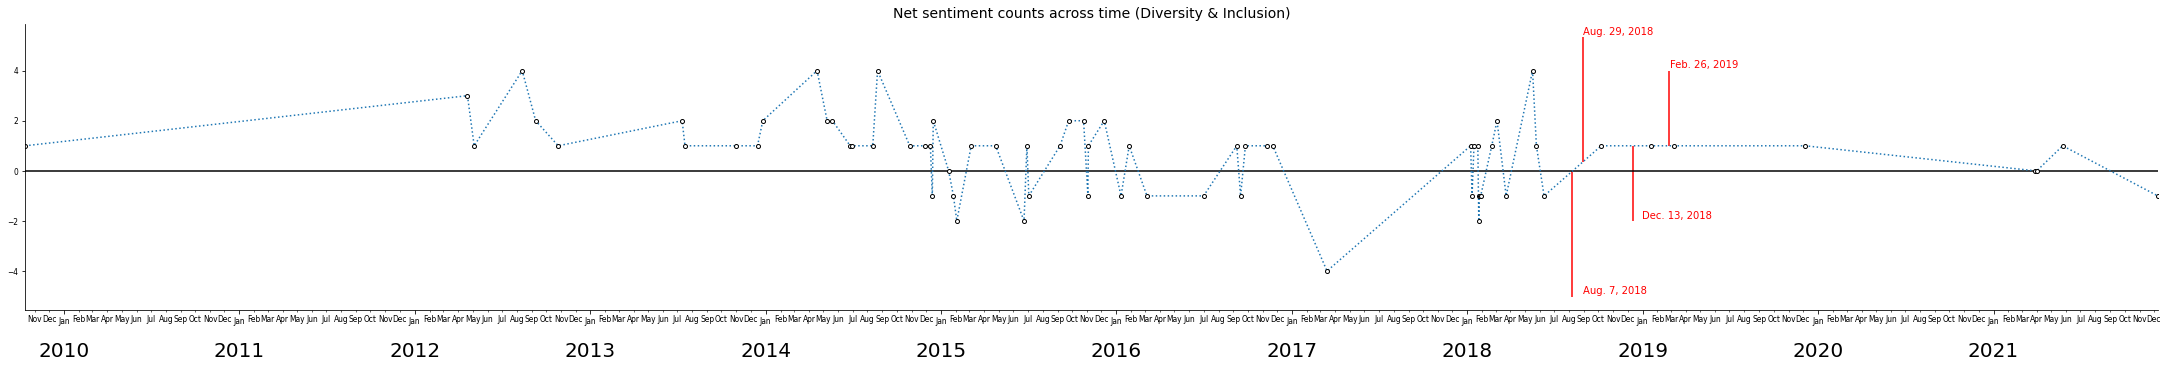

In [364]:
plot_net_sentiment_counts(riot_counts_df_1, "Net sentiment counts across time (Diversity & Inclusion)", riot_events_timeline, riot_shortened_annotations)

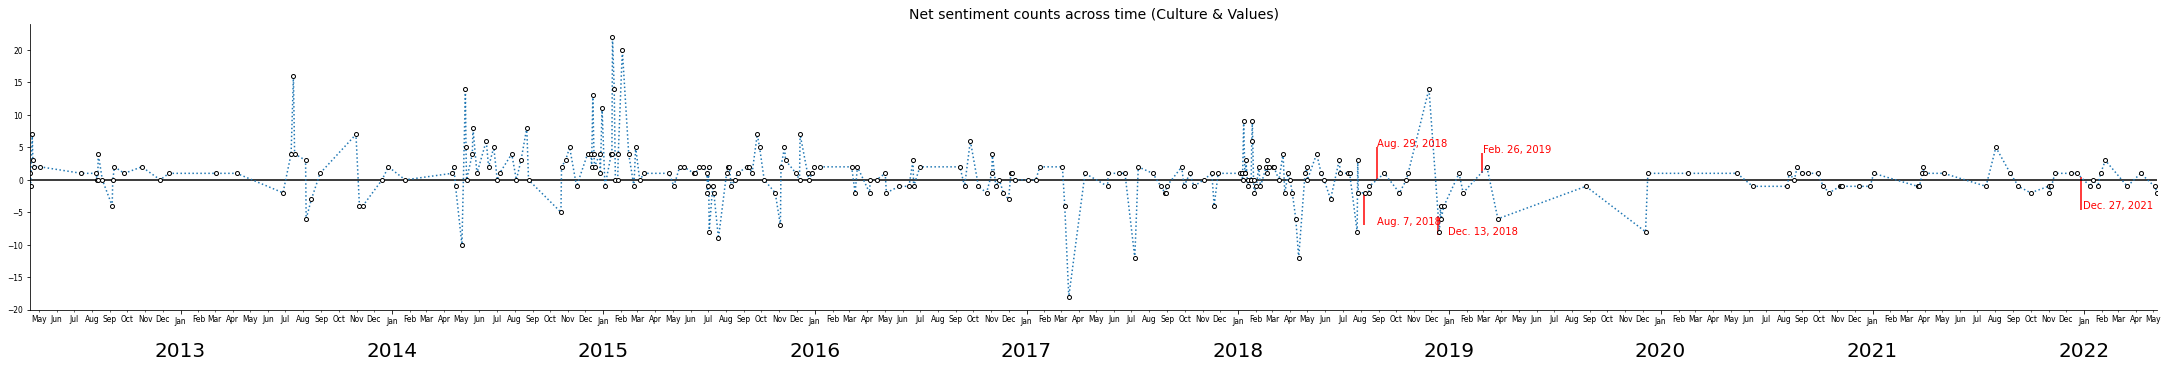

In [356]:
plot_net_sentiment_counts(riot_counts_df_2, "Net sentiment counts across time (Culture & Values)", riot_events_timeline, riot_shortened_annotations)

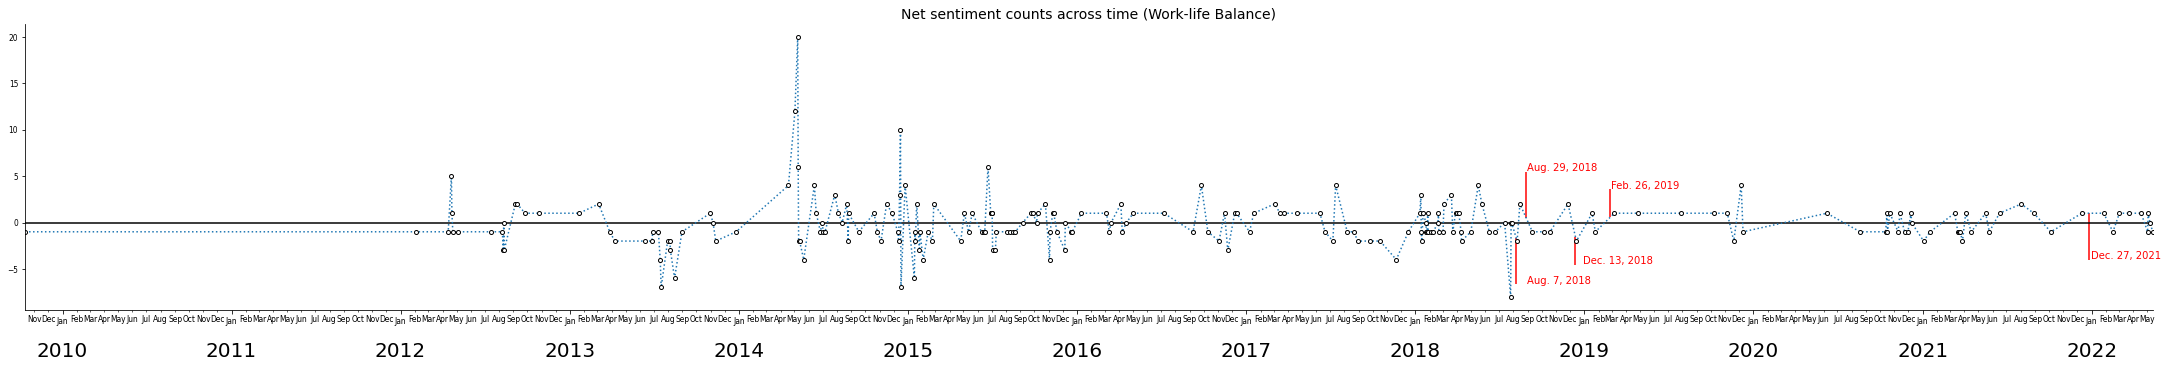

In [357]:
plot_net_sentiment_counts(riot_counts_df_3, "Net sentiment counts across time (Work-life Balance)", riot_events_timeline, riot_shortened_annotations)

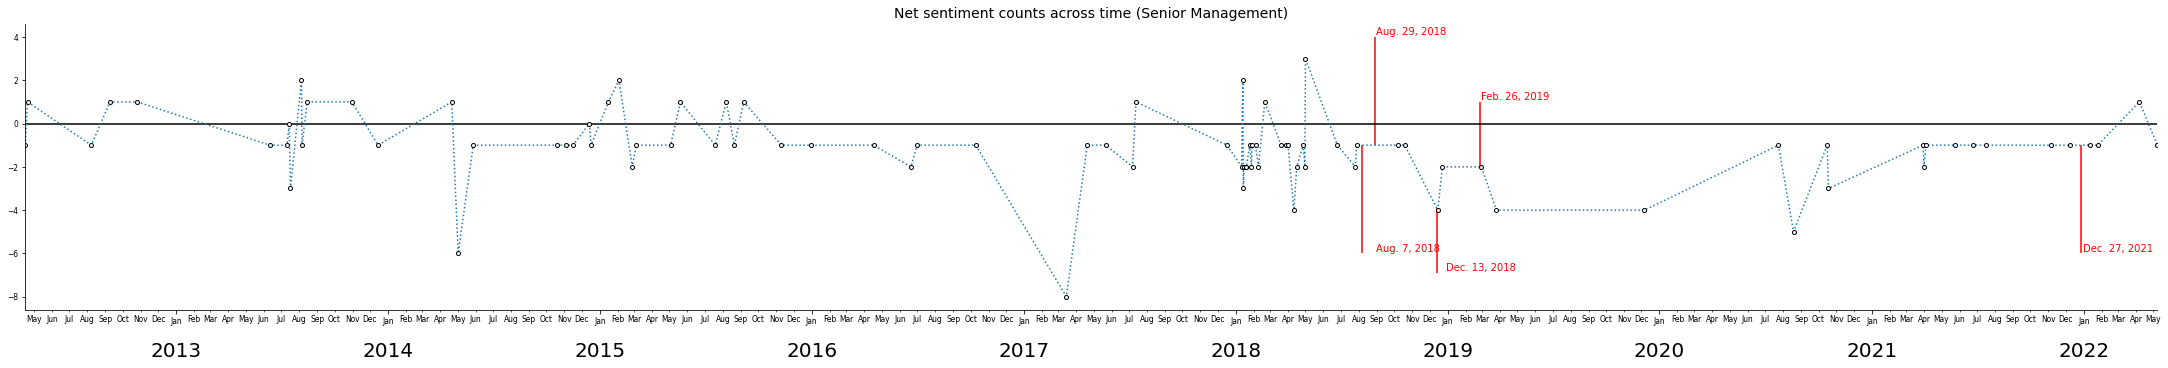

In [358]:
plot_net_sentiment_counts(riot_counts_df_4, "Net sentiment counts across time (Senior Management)", riot_events_timeline, riot_shortened_annotations)

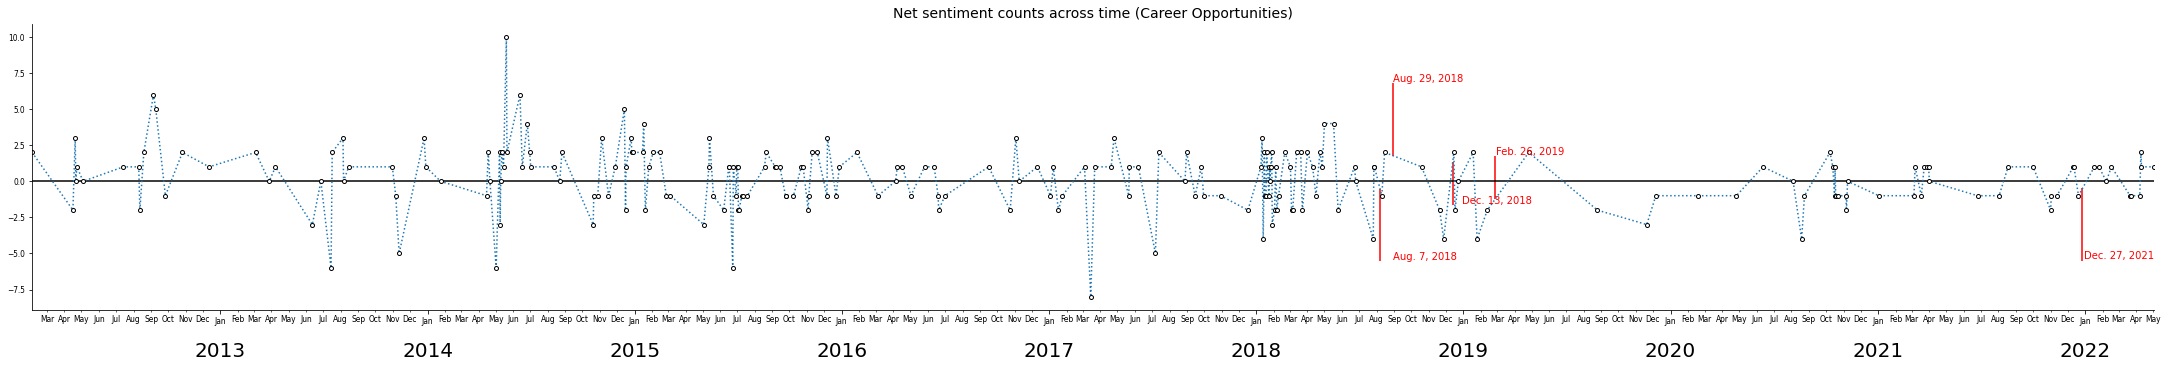

In [359]:
plot_net_sentiment_counts(riot_counts_df_5, "Net sentiment counts across time (Career Opportunities)", riot_events_timeline, riot_shortened_annotations)

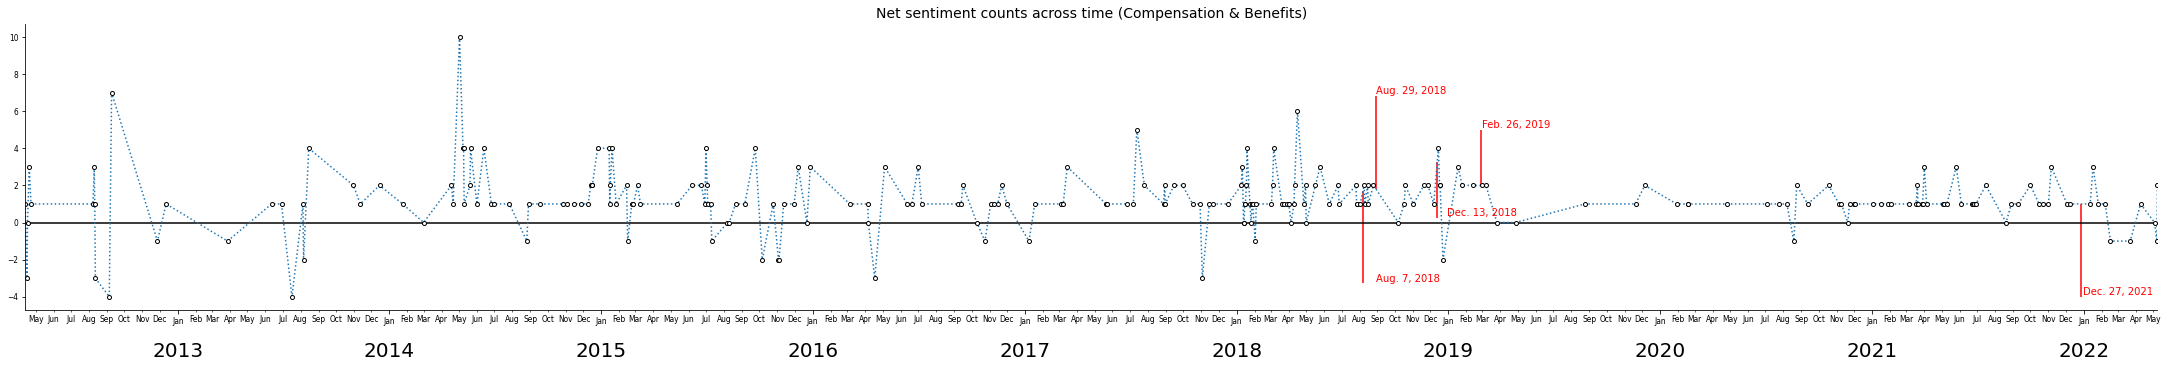

In [360]:
plot_net_sentiment_counts(riot_counts_df_6, "Net sentiment counts across time (Compensation & Benefits)", riot_events_timeline, riot_shortened_annotations)

## Company 2: Sony

In [345]:
# wtf

def plot_net_sentiment_counts_alt(df, title):

  fig, ax = plt.subplots(figsize=(30, 5), constrained_layout=True)
  ax.set_title(title, fontsize=14)

  # # Minor ticks every month.
  # fmt_month = mdates.MonthLocator()
  # # Minor ticks every year.
  # fmt_year = mdates.YearLocator()

  # ax.xaxis.set_minor_locator(fmt_month)
  # ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
  # ax.xaxis.set_major_locator(fmt_year)
  # ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

  # ax.tick_params(labelsize=7.5, which='both')
  # # Creating a second x-axis (years) beneath the first x-axis (months)
  # second_xaxis = ax.secondary_xaxis(-0.1)
  # second_xaxis.xaxis.set_major_locator(fmt_year)
  # second_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

  # # Hide second x-axis spines & ticks
  # second_xaxis.spines['bottom'].set_visible(False)
  # second_xaxis.tick_params(length=0, labelsize=20)
  
  # Draw a horizontal line at y=0
  plt.hlines(0, xmin=df.index[0], xmax=df.index[-1], color='k', linestyle='-')
  
  ax.plot(df.index, df['counts'], marker='o', linestyle=':', markersize=4, fillstyle='full', markeredgecolor='k', markerfacecolor='w')
  
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  ax.margins(x=0)

  plt.show()

### Timelines

In [318]:
# TODO

sony_events_timeline = []
sony_events_annotations = []

### Plotting net sentiment counts across time

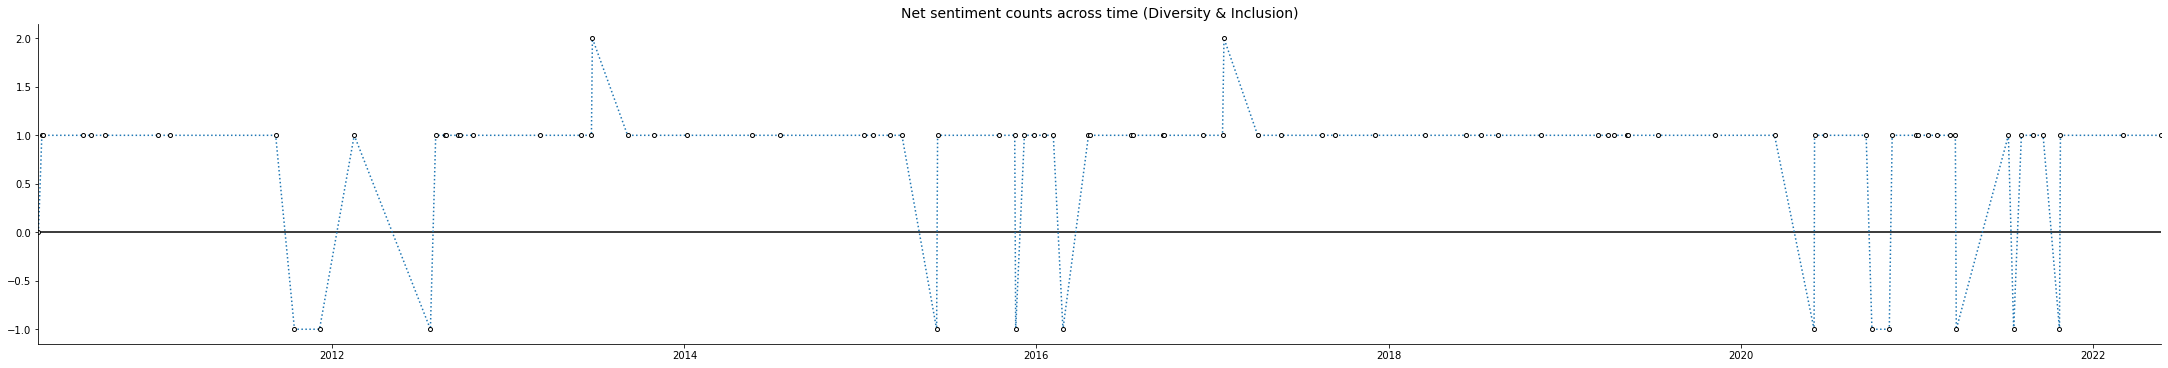

In [365]:
plot_net_sentiment_counts_alt(sony_counts_df_1, "Net sentiment counts across time (Diversity & Inclusion)")

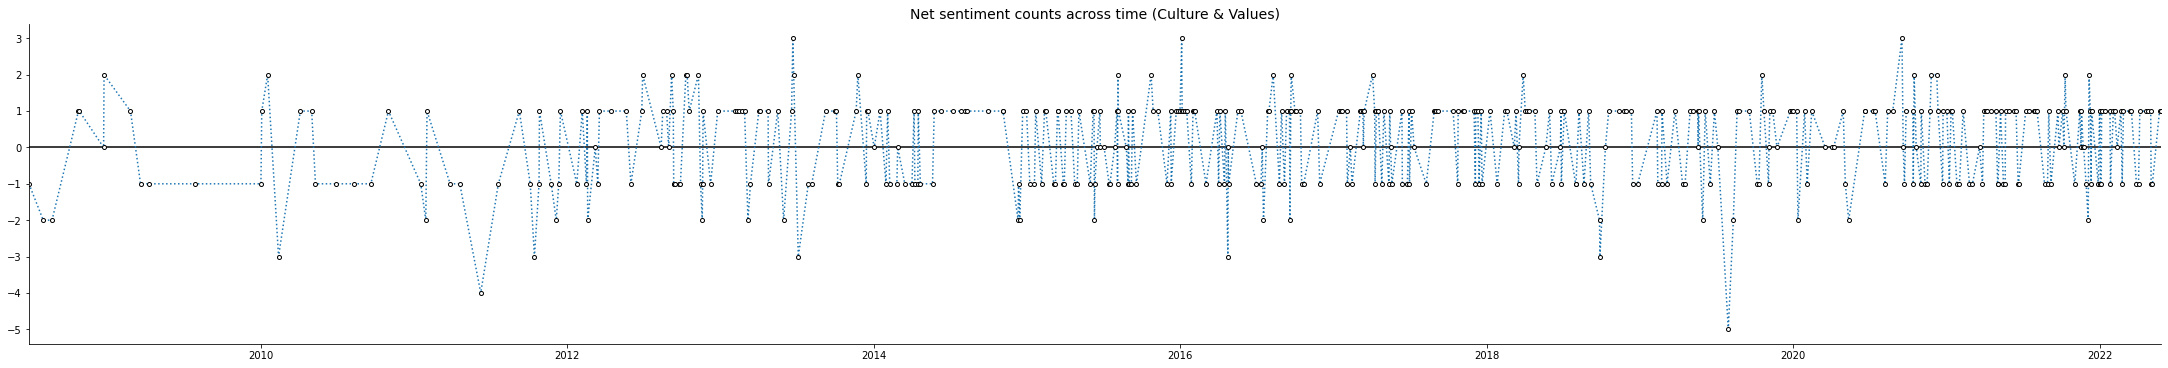

In [366]:
plot_net_sentiment_counts_alt(sony_counts_df_2, "Net sentiment counts across time (Culture & Values)")

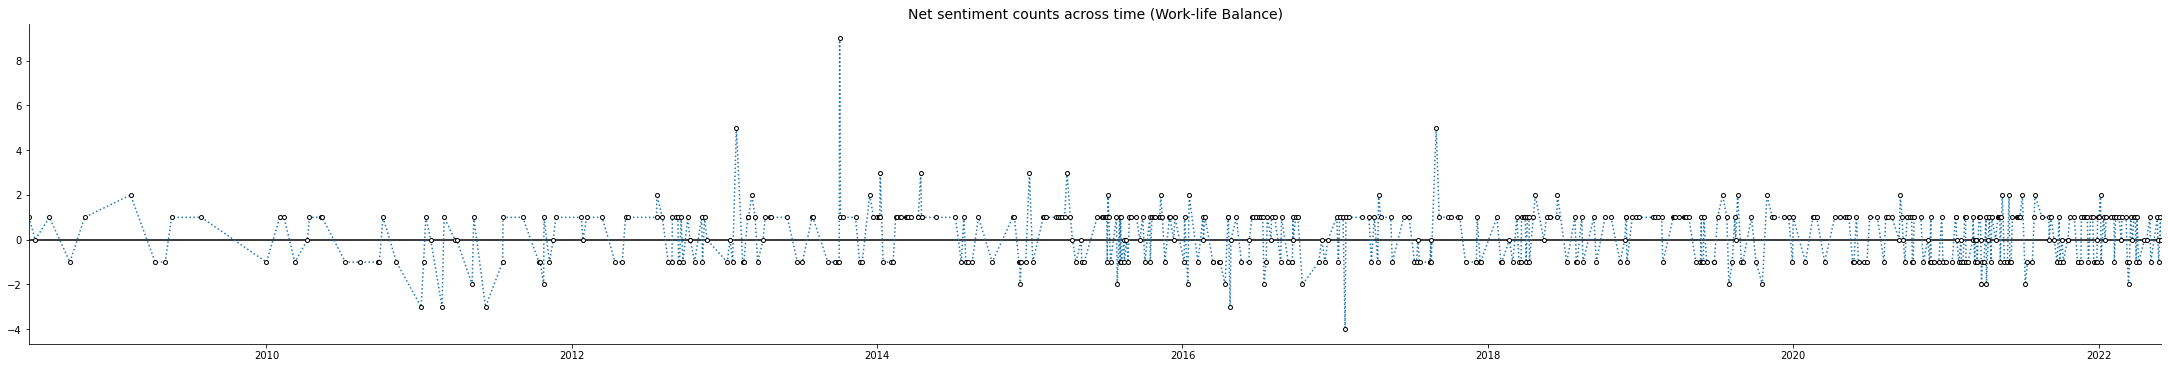

In [367]:
plot_net_sentiment_counts_alt(sony_counts_df_3, "Net sentiment counts across time (Work-life Balance)")

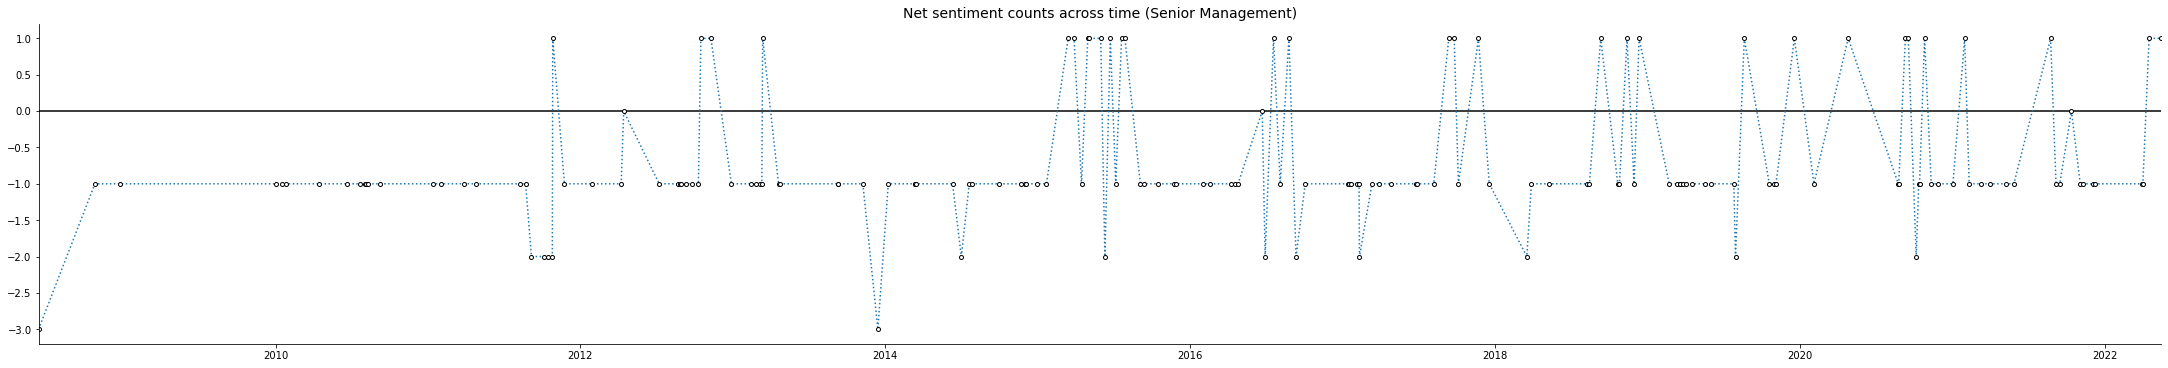

In [368]:
plot_net_sentiment_counts_alt(sony_counts_df_4, "Net sentiment counts across time (Senior Management)")

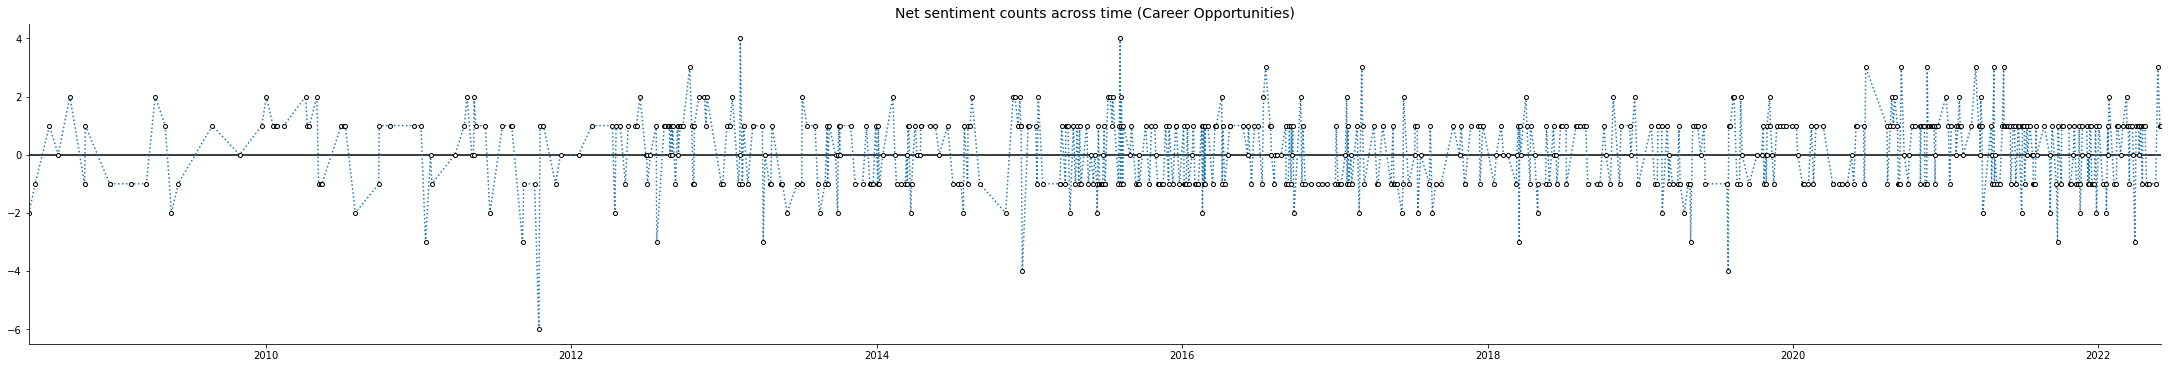

In [369]:
plot_net_sentiment_counts_alt(sony_counts_df_5, "Net sentiment counts across time (Career Opportunities)")

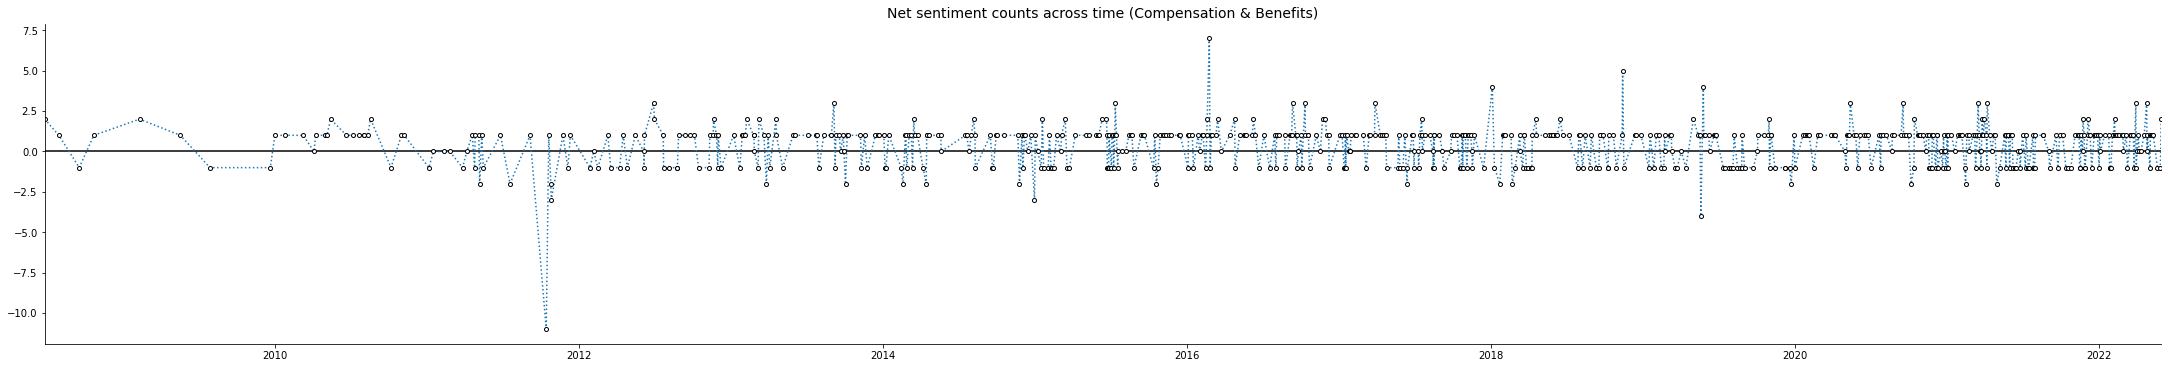

In [370]:
plot_net_sentiment_counts_alt(sony_counts_df_6, "Net sentiment counts across time (Compensation & Benefits)")

## Company 3: Ubisoft

### Timelines

In [ ]:
# TODO

ubisoft_events_timeline = []
ubisoft_events_annotations = []

### Plotting net sentiment counts across time